<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 7 - Binary Classification Methods</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

---
## Installing and Importing Libraries

In [1]:
import sklearn
import seaborn as sns #visualisation
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt #visualisation
%matplotlib inline

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


## Loading the Dataset

In [2]:
# Uploading a dataset from the local machine into Google Colab
# This allows me to bring in the file I want to work with (e.g., a CSV file containing car data)

from google.colab import files
uploaded = files.upload()

# What I understood:
# This code opens a file picker so I can upload a file. Once uploaded, I can read it into a pandas DataFrame.

Saving bots_vs_users.csv to bots_vs_users.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bots_vs_users.csv']))
print(df.shape)

(5874, 60)


In [4]:
df.head(10)

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
9,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [6]:
df.describe()

,target,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness
count,5874.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,0.500000,18.629044,19.552487,0.156463,0.143918,7.730661,544.752035,0.895945,0.610812,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009
std,0.500043,4.231994,41.954881,0.202730,0.187085,11.278711,746.728130,0.170084,2.461709,0.397830,0.033136,1617.635460,154.970296,0.009545,0.229815
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.400000,0.000000,0.000000,1.100000,86.600000,0.850000,0.000000,0.050000,0.000000,9.125000,1.980000,0.000000,0.580000
50%,0.500000,20.000000,7.600000,0.100000,0.050000,3.400000,267.800000,0.950000,0.000000,0.300000,0.000000,268.950000,30.950000,0.000000,0.710000
75%,1.000000,20.000000,26.075000,0.200000,0.200000,7.850000,616.850000,1.000000,0.200000,0.900000,0.000000,746.050000,89.480000,0.000000,0.830000
max,1.000000,20.000000,894.900000,1.000000,1.000000,61.600000,5841.250000,1.000000,64.050000,1.000000,0.950000,41415.700000,2866.590000,0.300000,1.000000


In [7]:
df.isnull().sum().sort_values(ascending=True).head(10)

,0
has_domain,0
has_birth_date,0
has_photo,0
can_post_on_wall,0
can_send_message,0
has_website,0
gender,0
has_short_name,0
has_first_name,0
has_last_name,0


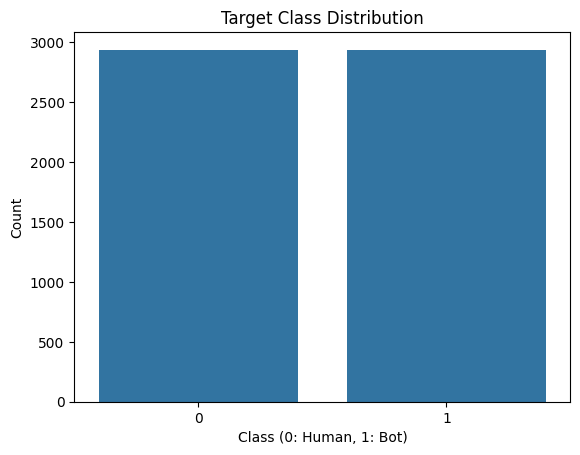

,proportion
target,
1,50.0
0,50.0


In [8]:
# Distribution of target variable (0 = human, 1 = bot)
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Class (0: Human, 1: Bot)')
plt.ylabel('Count')
plt.show()

# Display counts and percentages
df['target'].value_counts(normalize=True) * 100

In [9]:
# Separate numeric and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target column from numerical_cols
numerical_cols.remove('target')

print("Number of numerical features:", len(numerical_cols))
print("Number of categorical features:", len(categorical_cols))

Number of numerical features: 14
Number of categorical features: 45


In [10]:
# Fill numerical NaNs with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Confirm that categorical missing values are 'unknown'
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        print(f"{col} has missing values (not 'unknown')")

# Sanity check
print("Any remaining NaNs:", df.isnull().sum().sum())

Any remaining NaNs: 0


In [13]:
# Initialize label encoder
le = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Final shape check
df[categorical_cols].head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
1,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
2,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
3,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
4,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1


In [14]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (4699, 59)
Test set: (1175, 59)


### Logistic Regression:

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None, max_iter=120)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120, penalty=None)

In [17]:
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.94


In [19]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.9413112892103174, 0.9412729316598871, 0.9412750644833473, None)

In [20]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       588
           1       0.95      0.94      0.94       587

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



### SVM:

In [21]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='linear',max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=2, kernel='linear', max_iter=5000)

In [22]:
predictions = model.predict(X_test)

In [23]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       588
           1       0.90      0.94      0.92       587

    accuracy                           0.91      1175
   macro avg       0.91      0.91      0.91      1175
weighted avg       0.91      0.91      0.91      1175



### Kernel SVM:

In [49]:
model = SVC(C=1,kernel='poly', degree=3, max_iter=3500)
model.fit(X_train, y_train)

SVC(C=1, kernel='poly', max_iter=3500)

In [50]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.79


In [51]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       588
           1       0.77      0.83      0.80       587

    accuracy                           0.79      1175
   macro avg       0.79      0.79      0.79      1175
weighted avg       0.79      0.79      0.79      1175



In [52]:
model = SVC(C=1,kernel='rbf',max_iter=5000)    # C = 1 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

SVC(C=1, max_iter=5000)

In [53]:
predictions = model.predict(X_train)
print('Macro F1-score on Training set is %.2f' %f1_score(y_train, predictions, average='macro'))

Macro F1-score on Training set is 0.80


In [54]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.79


In [55]:
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       588
           1       0.77      0.84      0.80       587

    accuracy                           0.79      1175
   macro avg       0.80      0.79      0.79      1175
weighted avg       0.80      0.79      0.79      1175



### KNN:

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6, weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score on Training set is 0.94


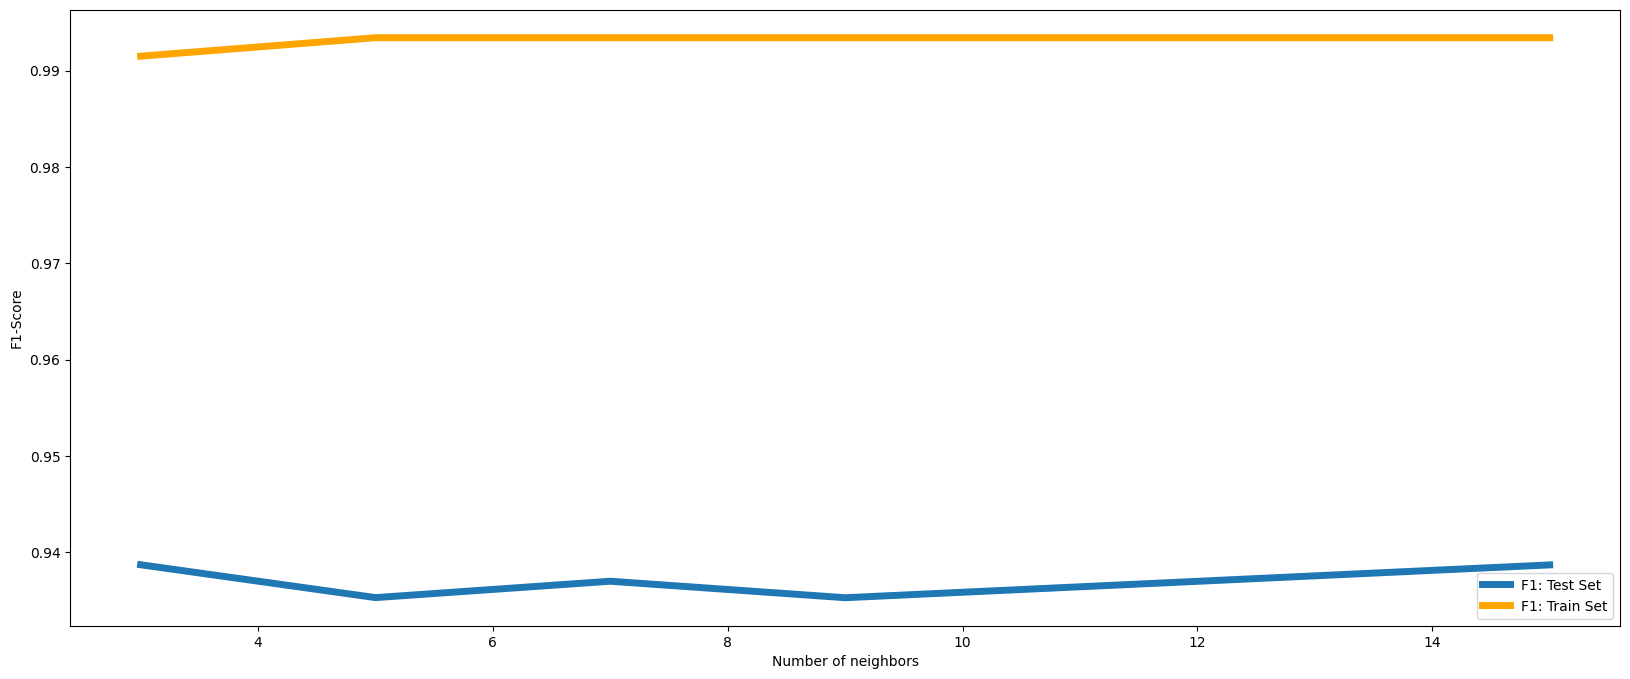

In [57]:
scores = []
neighbors_list = [3,5,7,9,15]
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=5)
plt.plot(neighbors_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


In [58]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score on Training set is 0.94


### Decision Trees:

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [60]:
predictions = model.predict(X_train)
print('Macro F1-score on Training set is %.2f' %f1_score(y_train, predictions, average='macro'))

Macro F1-score on Training set is 0.98


In [61]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.95


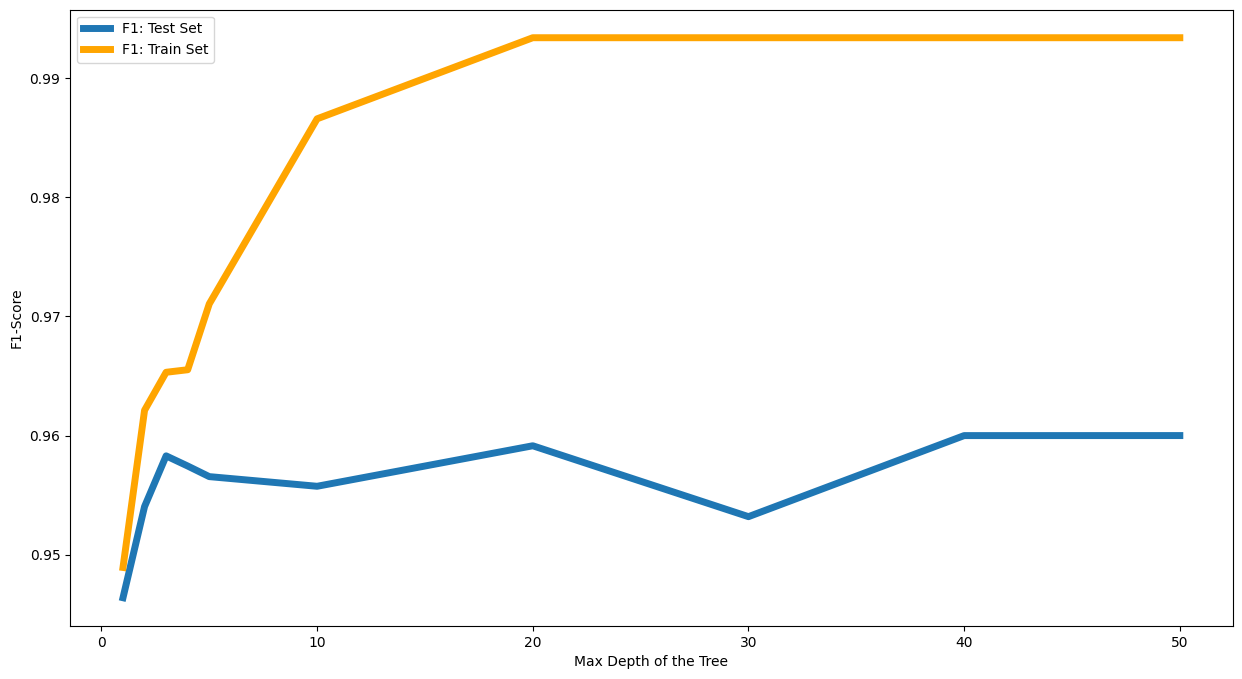

In [63]:
scores = []
depths_list = [1,2,3,4,5,10,20,30,40,50]
scores = []
scores_train = []
for depth in depths_list:

    # Create the model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(15,8))
plt.plot(depths_list,scores,lw=5)
plt.plot(depths_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


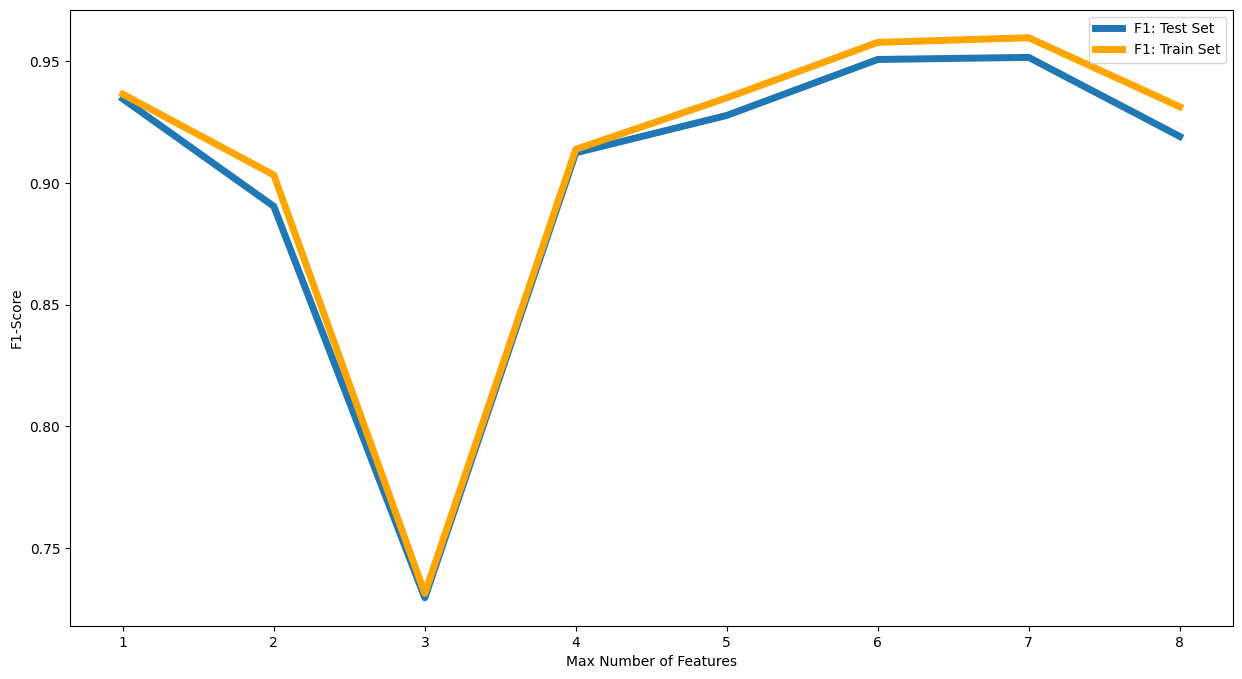

In [65]:
scores = []
features_list = [1,2,3,4,5,6,7,8]
scores = []
scores_train = []
for no_features in features_list:

    # Create the model
    model = DecisionTreeClassifier(max_features=no_features,max_depth=3)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(15,8))
plt.plot(features_list,scores,lw=5)
plt.plot(features_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Number of Features')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


In [66]:
model = DecisionTreeClassifier(max_features=3, max_depth=3)
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)

In [68]:
print("Classification Report:\n", classification_report(y_train, predictions_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2349
           1       0.97      0.84      0.90      2350

    accuracy                           0.91      4699
   macro avg       0.91      0.91      0.91      4699
weighted avg       0.91      0.91      0.91      4699



In [70]:
model = DecisionTreeClassifier(max_features=3, max_depth=3)
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)

In [71]:
print("Classification Report:\n", classification_report(y_test, predictions_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       588
           1       0.97      0.93      0.95       587

    accuracy                           0.95      1175
   macro avg       0.95      0.95      0.95      1175
weighted avg       0.95      0.95      0.95      1175



### Random Forests:

In [72]:
# Initialize and train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       588
           1       0.98      0.96      0.97       587

    accuracy                           0.97      1175
   macro avg       0.97      0.97      0.97      1175
weighted avg       0.97      0.97      0.97      1175



In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=10,)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10)

In [74]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.97


##  Explain 3 techniques regualarize the training process for decision trees.

## Regularization Techniques for Decision Trees

To prevent overfitting and improve generalization, decision trees can be regularized using several hyperparameters. Below are three common techniques:

### 1. Max Depth (`max_depth`)
**What it does:**  
Limits how deep the tree can grow. A very deep tree can perfectly memorize the training data (overfitting), while a shallow tree is more general.

**How it helps:**  
- Prevents the tree from growing too complex.
- Forces the model to focus on the most important splits.

**Example:**  
```python
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
```

---

### 2. Minimum Samples Split (`min_samples_split`)
**What it does:**  
Sets the minimum number of samples required to split an internal node.

**How it helps:**  
- Avoids creating nodes that capture noise in small subsets.
- Ensures splits only happen when there's enough data to justify it.

**Example:**
```python
tree = DecisionTreeClassifier(min_samples_split=10)
```

---

### 3. Minimum Samples Leaf (`min_samples_leaf`)
**What it does:**  
Specifies the minimum number of samples required to be in a leaf node.

**How it helps:**  
- Prevents the tree from creating leaf nodes that represent only a few samples.
- Helps smooth the model by reducing sensitivity to small fluctuations.

**Example:**
```python
tree = DecisionTreeClassifier(min_samples_leaf=5)
```

---

### Bonus: Other Regularization Tricks
- `max_leaf_nodes`: Limits the total number of leaf nodes.
- `max_features`: Limits the number of features considered for a split (adds randomness, useful in ensembles like Random Forest).


---

40 Bonus points: On the dataset we used in the lab session (for detecting diabetes), achieve an F1 score above 0.9 (on the test set) using whatever classification method you like (test set should be 20% of the whole data).

All scores are measured on test set, which should be 20% of the whole dataset

In [75]:
# Uploading a dataset from the local machine into Google Colab
# This allows me to bring in the file I want to work with (e.g., a CSV file containing car data)

from google.colab import files
uploaded = files.upload()

# What I understood:
# This code opens a file picker so I can upload a file. Once uploaded, I can read it into a pandas DataFrame.

Saving diabetes.csv to diabetes.csv


In [76]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(df.shape)

(768, 9)


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','DiabetesPedigreeFunction']      # Specify the columns to standard scale
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,2.451743e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-1.189553e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.889685e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-3.001282e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.662269e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,5.883565e+00


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_scaling_columns = ['Age','Insulin','BMI']    # Specify the columns to scale using the min/max method

df[minmax_scaling_columns] = scaler.fit_transform(df[minmax_scaling_columns])
df[minmax_scaling_columns].describe()

,Age,Insulin,BMI
count,768.000000,768.000000,768.000000
mean,0.204015,0.094326,0.476790
std,0.196004,0.136222,0.117499
min,0.000000,0.000000,0.000000
25%,0.050000,0.000000,0.406855
50%,0.133333,0.036052,0.476900
75%,0.333333,0.150414,0.545455
max,1.000000,1.000000,1.000000


In [79]:
y = df.pop('Outcome')

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(614, 8)
(154, 8)


In [85]:
# Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)

# Results
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:27:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.50      0.50      0.50        52

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.66      0.66       154



In [89]:
import shap

# Create TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb)

# Sample a subset of data for SHAP
X_sample = X_test.sample(100, random_state=42)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

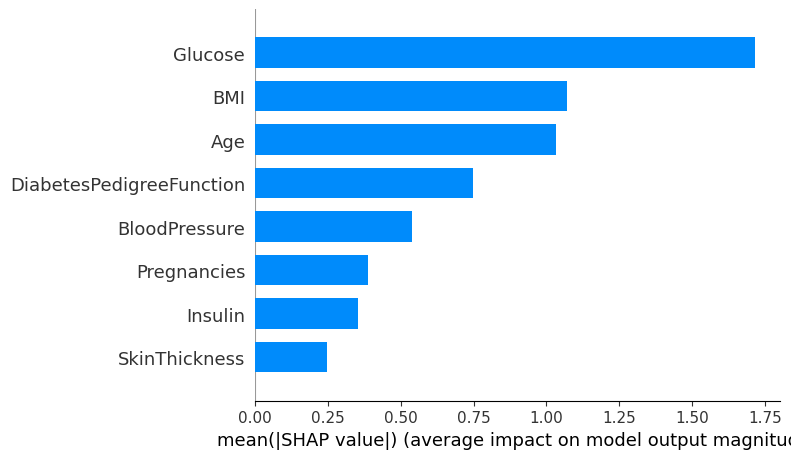

In [90]:
# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_sample, plot_type='bar')

In [91]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_iter=20,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [92]:
y_pred_best = best_model.predict(X_test)

# Evaluation
print("Tuned XGBoost Classification Report:\n", classification_report(y_test, y_pred_best))

Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       102
           1       0.60      0.58      0.59        52

    accuracy                           0.73       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.73      0.73       154



Not enough!

In [93]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_cat))

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       102
           1       0.68      0.54      0.60        52

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [94]:
# Wrap CatBoost for scikit-learn compatibility
cat_model_sklearn = CatBoostClassifier(verbose=0, random_state=42)

# Voting Classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('cat', cat_model_sklearn),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='hard',
    n_jobs=-1
)

# Train the ensemble
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = voting_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Voting Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Voting Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.66      0.52      0.58        52

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



Not enough!

In [97]:
# Recreate clean train/test
X = df

# Define numeric + categorical columns again
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Final model pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', voting_clf)
])

# Fit full pipeline
final_pipeline.fit(X_train, y_train)

# Predict & evaluate
y_pred_pipeline = final_pipeline.predict(X_test)
print("Final Pipeline Classification Report:\n", classification_report(y_test, y_pred_pipeline))

Final Pipeline Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.66      0.52      0.58        52

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



Not enough!

In [98]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

F1 Score: 0.5000
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.50      0.50      0.50        52

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.66      0.66       154



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train XGBoost
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score: 0.6140
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       102
           1       0.56      0.67      0.61        52

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.73      0.71      0.72       154



In [103]:
# Pipeline with imputation, scaling, SMOTE, and classifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5],
}

# Grid Search CV with F1 as scoring
grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"Best F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best F1 Score: 0.6957
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       102
           1       0.63      0.77      0.70        52

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154



In [106]:
# Define the pipeline
pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale the data
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE for class balancing
    ('clf', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Hyperparameter grid for RandomForest
param_grid = {
    'clf__n_estimators': [100, 150, 200],  # Number of trees
    'clf__max_depth': [None, 5, 10],  # Maximum depth of each tree
    'clf__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'clf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'clf__bootstrap': [True, False],  # Bootstrap samples
}

# GridSearchCV with F1 as scoring
grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"Best F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

# Get the best parameters found by GridSearchCV
print(f"Best Parameters: {grid.best_params_}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best F1 Score: 0.6957
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       102
           1       0.63      0.77      0.70        52

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154

Best Parameters: {'clf__bootstrap': True, 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}


Not enough!